### This notebook processes this project's hypothesis 2: 
#### We expect the waste production trend to be downwards and recovery % to be upwards, especially post 2015 when all UN members agreed to UN’s Sustainable Development Goals (Goal 13: Climate action- Take urgent action to combat climate change and its impacts). The Paris Climate Change Agreement was also launched in 2015 making the hypothesis more sound.

In [1]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import datetime
from IPython.display import display, HTML
import Hypothesis_2_func as hyp

##### Import the data processing notebook to use the merged dataframe directly

In [2]:
%%capture 
%run climate_change_data_processing.ipynb

In [3]:
pd.set_option('display.max_columns', None)
clean_df.head()

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,Composting,Electronic_waste,Household_waste,Landfill,Municipal_waste_generated,Municipal_waste_generated_percapita,Municipal_waste_generated_1990,Municipal_waste_generated_2000,Municipal_waste_treated,Recycling,Total_Incineration,Waste_from_households,Country_y,CO2_emissions_percapita,Female_education_attainment_bach,Male_education_attainment_bach,Total_education_attainment_bach,Energy_use_percapita,Forest_area,GDP_2015_USD,GDP_growth%,GDP_percapita_2015_USD,GDP_percapita_growth%,Education_expense_%_of_gdp,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.0,814.0,NaN,NaN,1977.0,3204.0,414.814,100.0,68.963,3513.0,399.0,312.0,2504.0,Austria,7.589364,NaN,NaN,NaN,3240.111359,37756.7,2.406290e+11,4.345641,31340.681293,3.553548,4.95725,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.0,237.0,NaN,NaN,1737.0,3436.0,343.375,100.0,71.131,3961.0,203.0,1784.0,2884.0,Belgium,10.966775,NaN,NaN,NaN,4809.867268,7632.0,2.934562e+11,3.137402,29441.662148,2.830268,NaN,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.6,260.0,NaN,NaN,930.0,4100.6,616.366,100.0,86.675,4100.6,910.6,2000.0,2733.7,Switzerland,6.452219,NaN,NaN,NaN,3627.692811,11535.0,4.714249e+11,3.674626,70199.323900,2.615466,4.38825,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67668.0,NaN,100.0,57.254,NaN,NaN,NaN,NaN,China,1.914543,NaN,NaN,NaN,766.995329,1571405.9,1.027377e+12,3.920251,905.030859,2.406559,NaN,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49857.0,630.670,100.0,94.408,NaN,NaN,NaN,NaN,Germany,12.026609,NaN,NaN,NaN,4421.364531,113000.0,2.342139e+12,5.255006,29485.709974,4.351639,NaN,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365


In [4]:
#subset df with only required columns
#time trend plots
#hist plot
#bar graphs
#box plots for summary stats
#corr plot
#pairwise plot
#correlation matrix
#corr test (pearson)
#conclusion

In [5]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [6]:
clean_df["Country"].unique()

<StringArray>
[                     'Austria',                      'Belgium',
                  'Switzerland', "China (People's Republic of)",
                      'Germany',                        'Spain',
               'United Kingdom',                       'Greece',
                      'Hungary',                        'Italy',
                        'Japan',                        'Korea',
                   'Luxembourg',                  'Netherlands',
                       'Norway',                  'New Zealand',
                       'Poland',                     'Portugal',
                       'Sweden',                'United States',
                       'Mexico',                      'Türkiye',
                    'Australia',                      'Finland',
                       'France',              'Slovak Republic',
                      'Denmark',               'Czech Republic',
                       'Cyprus',                      'Estonia',
           

#### Cleaning Data further for my analysis

Removing countries where columns "Recovery%" or "Municipal_waste_generated_percapita" has all null or nan values

In [7]:
df1 = hyp.clean_data1(clean_df.copy(deep = True))

In [8]:
print(list((df1["Country"].unique())))

['Austria', 'Belgium', 'Switzerland', 'Germany', 'Spain', 'United Kingdom', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Sweden', 'United States', 'Mexico', 'Türkiye', 'Australia', 'Finland', 'France', 'Slovak Republic', 'Denmark', 'Czech Republic', 'Estonia', 'Ireland', 'Iceland', 'Lithuania', 'Latvia', 'Slovenia', 'Canada', 'Chile', 'Israel', 'Colombia', 'Costa Rica']


### Time Series Trend for Recovery Percentage

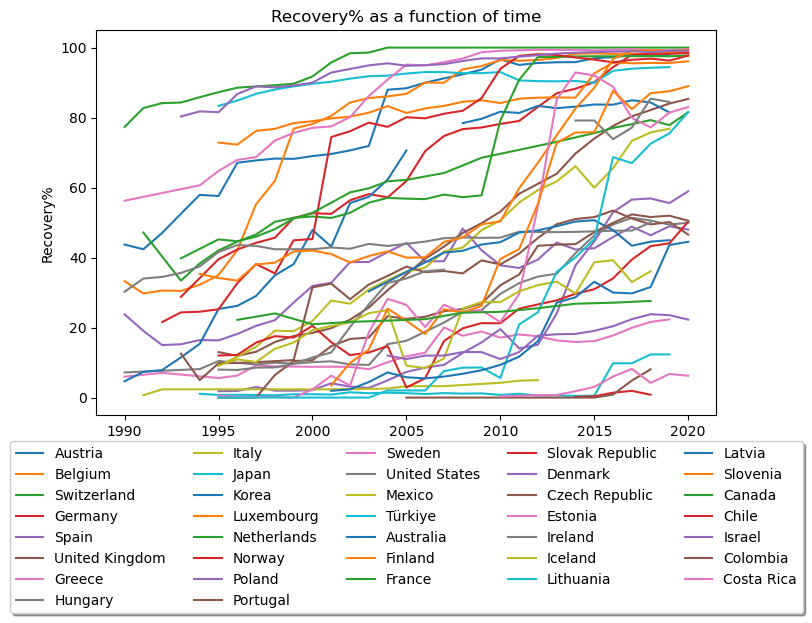

In [9]:
fig, ax = hyp.time_series(df1.copy(deep = True), "Recovery%")
plt.show()

Recovery% as a function of time


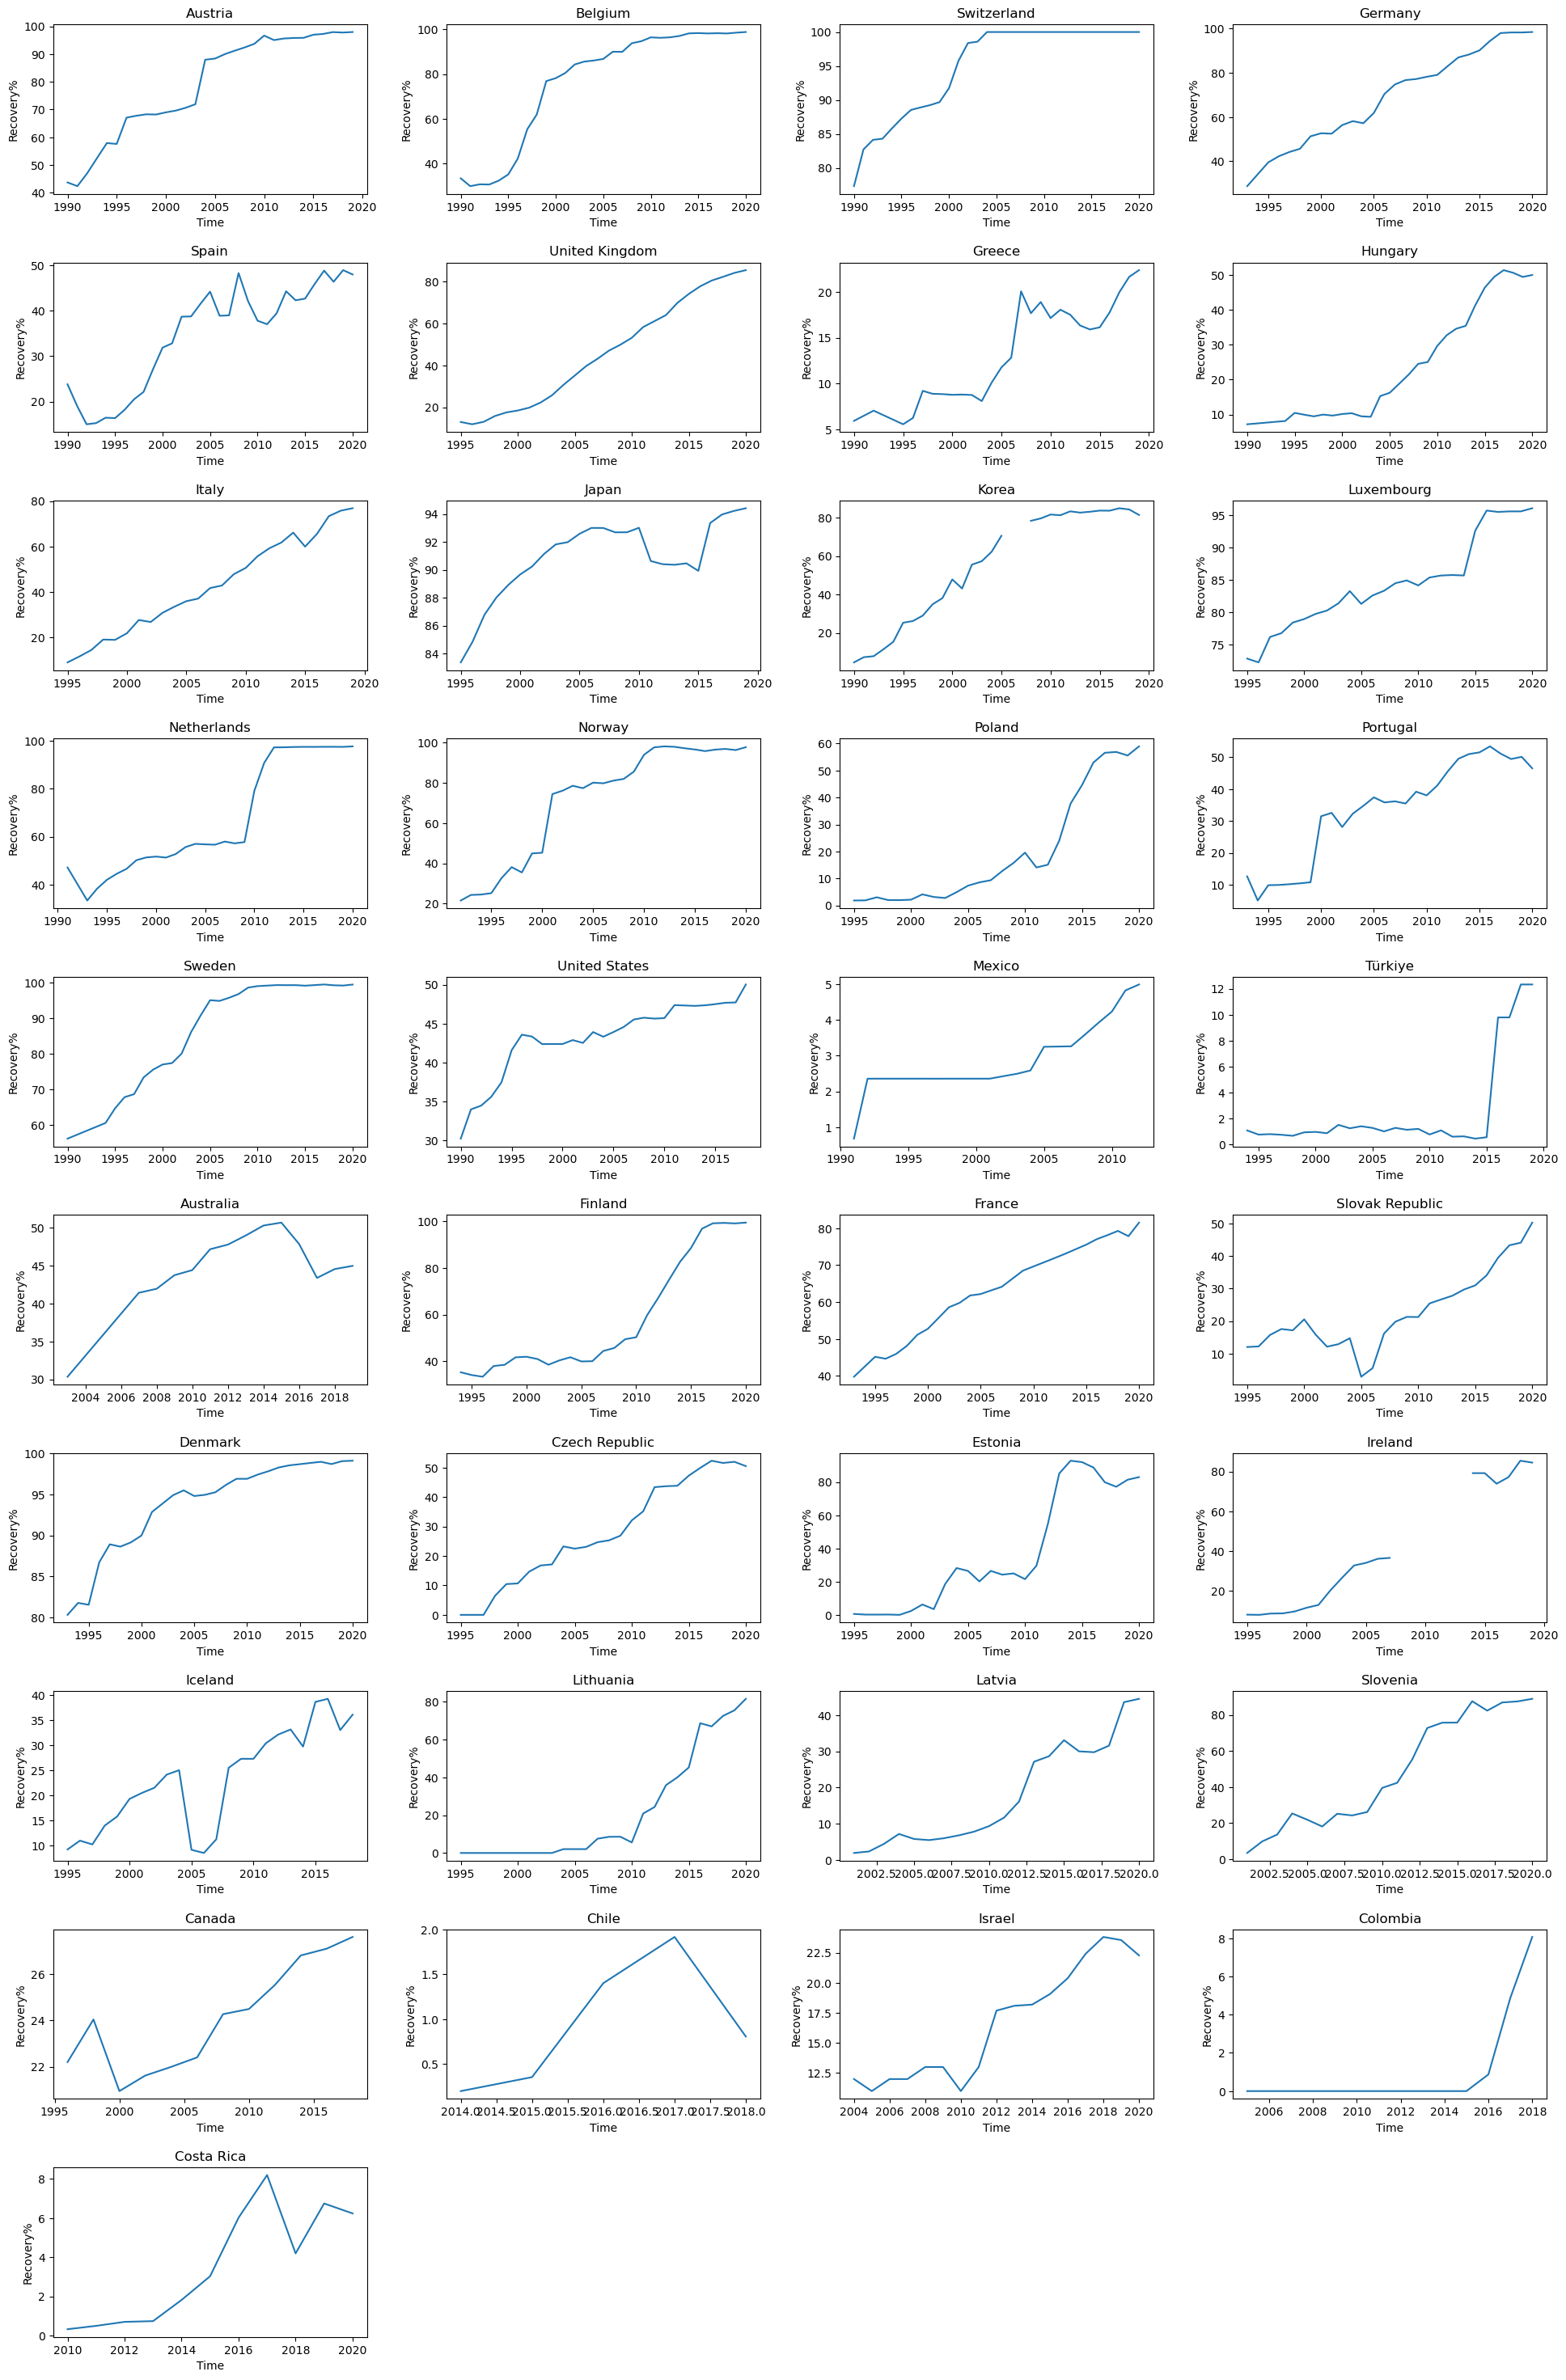

In [10]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Recovery%")
print("Recovery% as a function of time")
plt.show()


### Time Series Trend for Municipal waste generated per capita

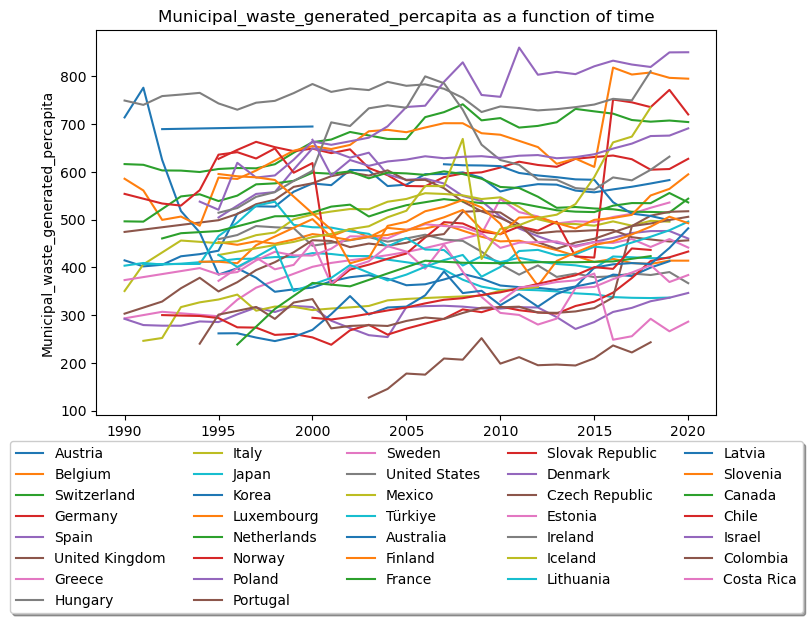

In [11]:
fig, ax = hyp.time_series(df1.copy(deep = True), "Municipal_waste_generated_percapita")
plt.show()

Municipal_waste_generated_percapita as a function of time


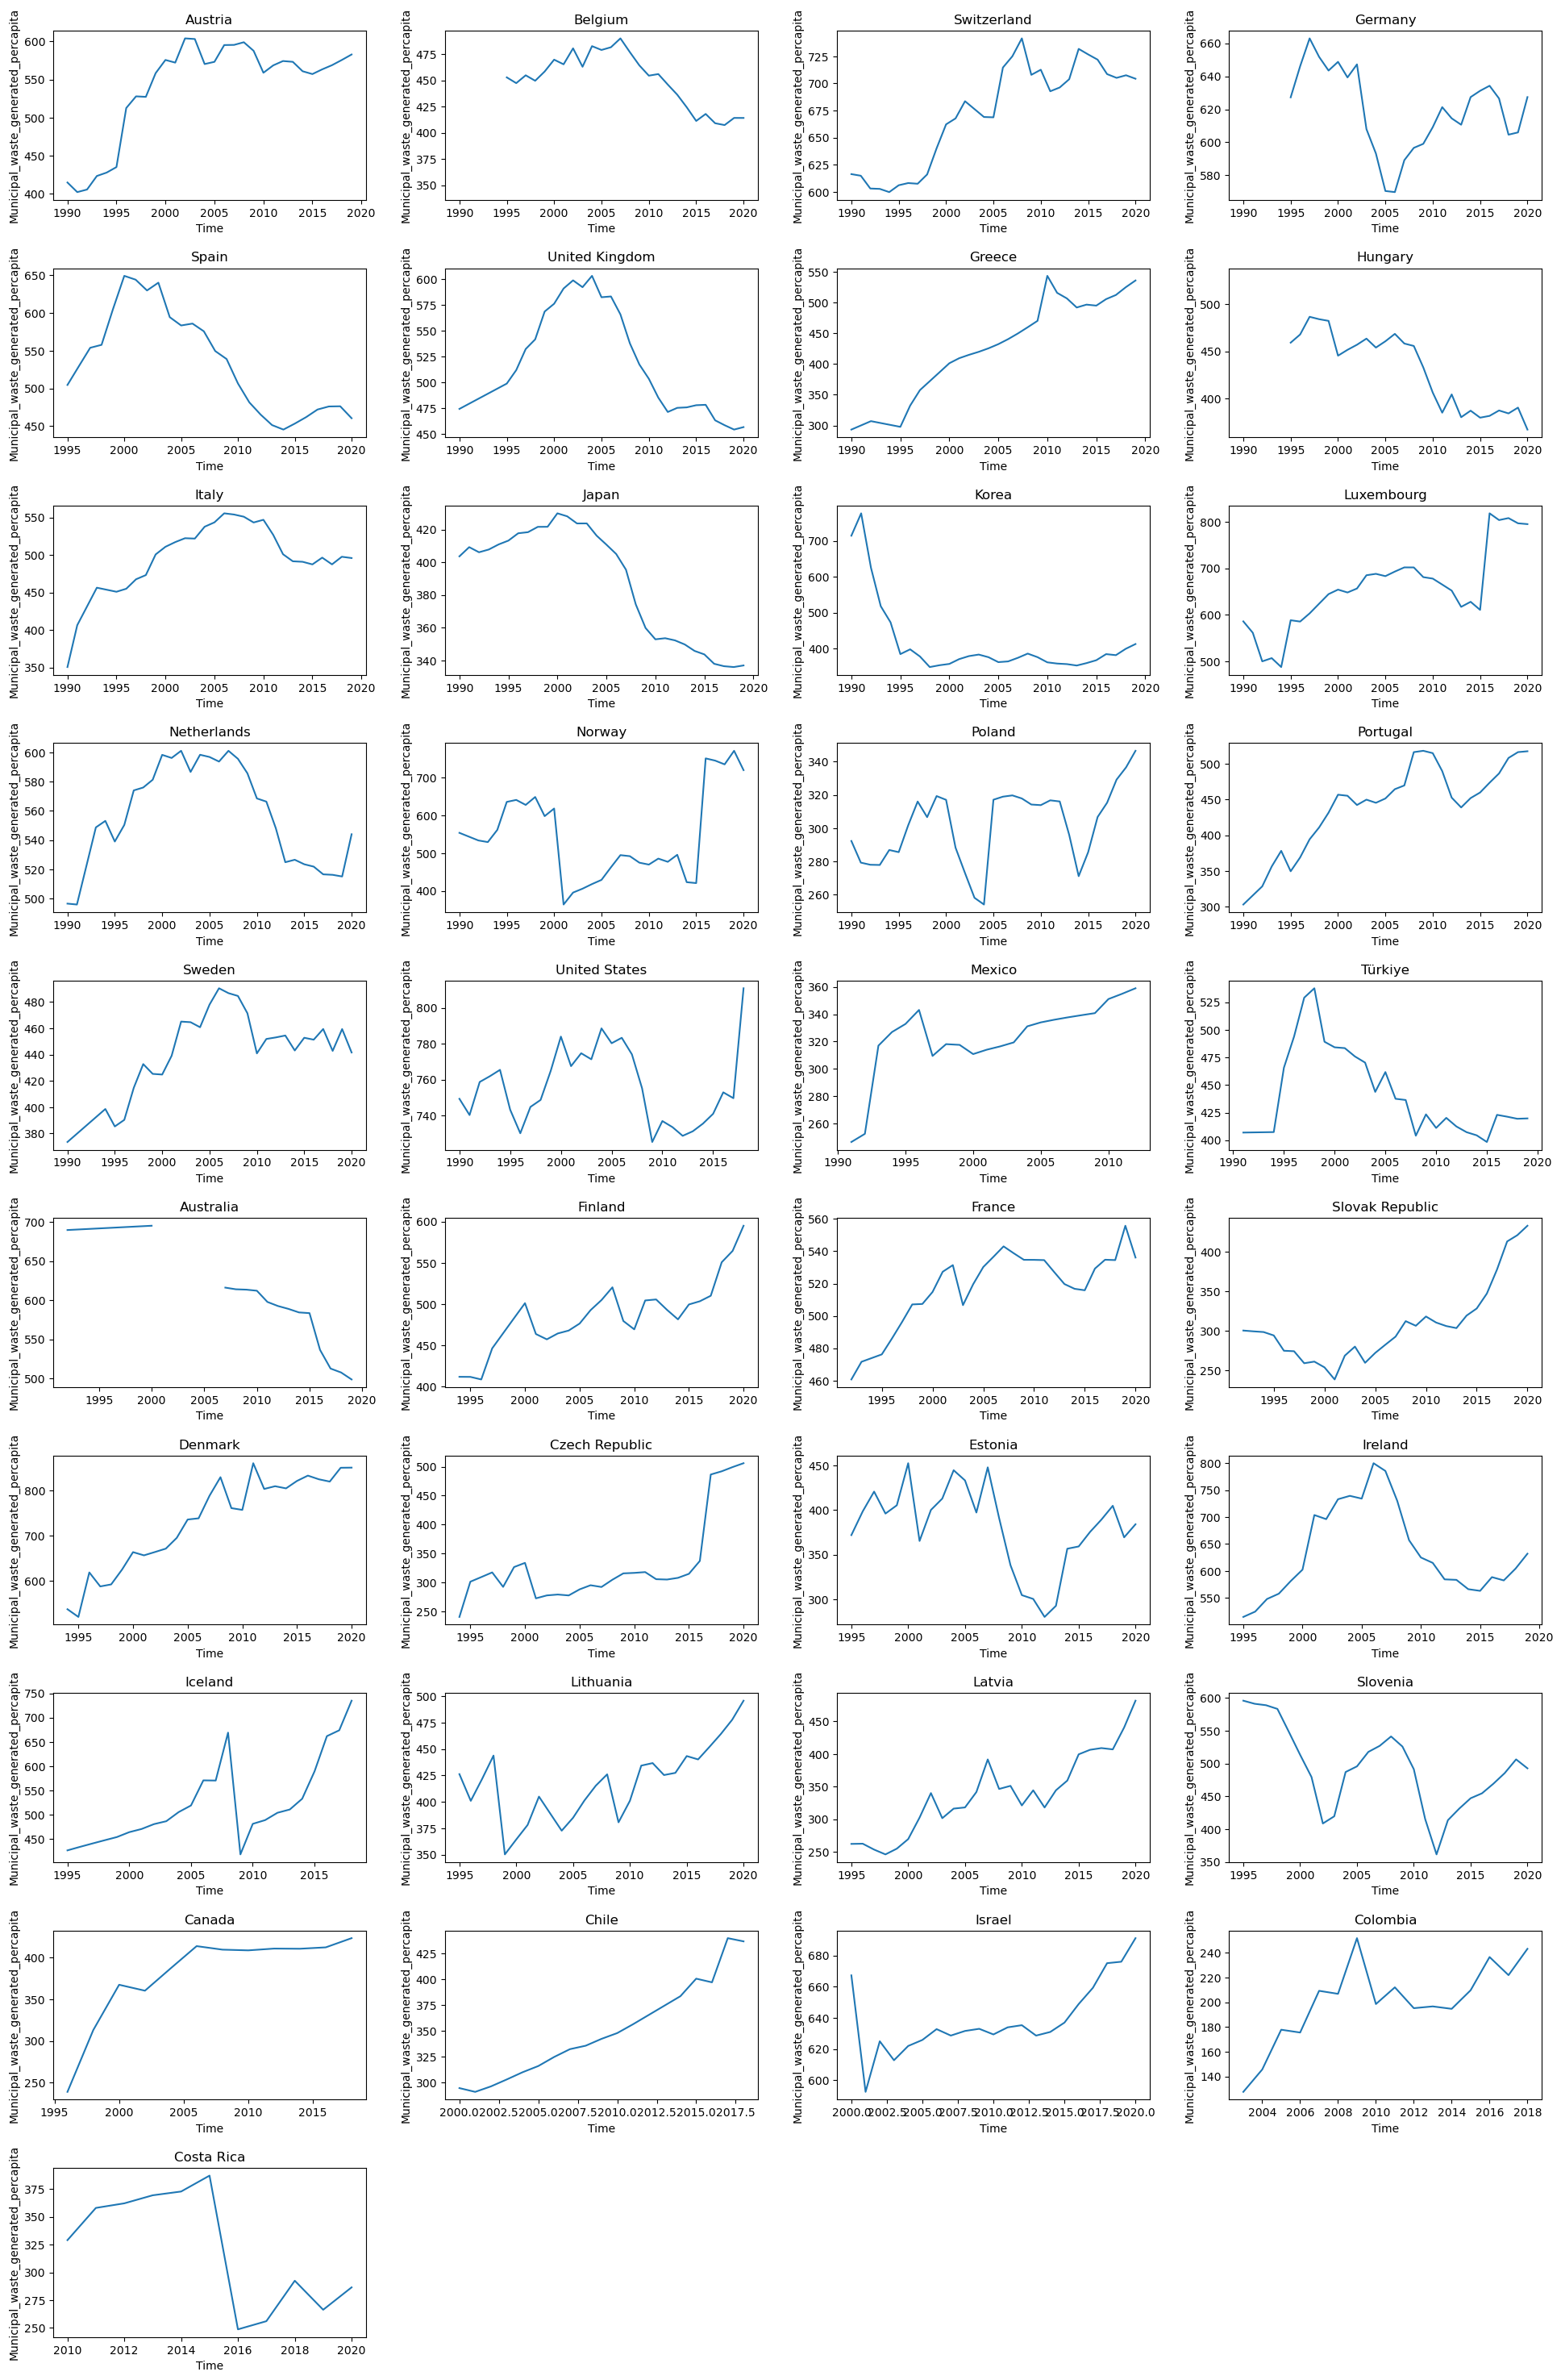

In [12]:
fig, axs = hyp.time_series_subplots(df1.copy(deep = True), "Municipal_waste_generated_percapita")
print("Municipal_waste_generated_percapita as a function of time")
plt.show()


### Correlation between Recovery% and Municipal_waste_generated_percapita for each country

In [13]:
corr_list = hyp.calculate_correlation(df1.copy(deep = True))
cnt = 1
for i1 in corr_list:
    print(i1, end = " ")
    if cnt%3==0:
        print(" ")
    cnt+=1

['Austria', 0.8118070209887491] ['Belgium', 0.13208038061029756] ['Switzerland', 0.9000577713485735]  
['Germany', -0.33854903164205274] ['Spain', -0.3382507250854805] ['United Kingdom', -0.7680471338686581]  
['Greece', 0.8988495628112042] ['Hungary', -0.9094158903341515] ['Italy', 0.141209333622698]  
['Japan', -0.5062255205560826] ['Korea', -0.6673896328441645] ['Luxembourg', 0.8160424958389471]  
['Netherlands', -0.539750980195283] ['Norway', -0.12021948063644552] ['Poland', 0.35983196183599697]  
['Portugal', 0.7818307583777615] ['Sweden', 0.7984473260829911] ['United States', -0.021757389658548232]  
['Mexico', 0.7667401928963388] ['Türkiye', -0.2634527364278726] ['Australia', -0.028415735028673707]  
['Finland', 0.7454337960068242] ['France', 0.7767512926310797] ['Slovak Republic', 0.8920768778461962]  
['Denmark', 0.9354693694756144] ['Czech Republic', 0.6097845580442711] ['Estonia', -0.34849062187020424]  
['Ireland', -0.047008606965265806] ['Iceland', 0.5265541403884304] ['Li

#### Based on pearson corrrelation we group the countries into 3 groups and observe their trends
* Groups are made on the basis of pearson correlation values
* Group 1 corr<0.-25 (this shows that one variable increases while other decreases)
* Group 2 corr>0.25 (this shows that both variables increase)
* Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

In [14]:
# Groups are made on the basis of pearson correlation values
# Group 1 corr<0.-25 (this shows that one variable increases while other decreases)
# Group 2 corr>0.25 (this shows that both variables increase)
# Group 3 -0.25<corr<0.25 (this shows variables show less correlation)

corr_list1, corr_list2, corr_list3 = hyp.country_groups(corr_list)

In [15]:
corr_list1


[['Germany', -0.33854903164205274],
 ['Spain', -0.3382507250854805],
 ['United Kingdom', -0.7680471338686581],
 ['Hungary', -0.9094158903341515],
 ['Japan', -0.5062255205560826],
 ['Korea', -0.6673896328441645],
 ['Netherlands', -0.539750980195283],
 ['Türkiye', -0.2634527364278726],
 ['Estonia', -0.34849062187020424],
 ['Costa Rica', -0.8496349818186354]]

In [16]:
corr_list2

[['Austria', 0.8118070209887491],
 ['Switzerland', 0.9000577713485735],
 ['Greece', 0.8988495628112042],
 ['Luxembourg', 0.8160424958389471],
 ['Poland', 0.35983196183599697],
 ['Portugal', 0.7818307583777615],
 ['Sweden', 0.7984473260829911],
 ['Mexico', 0.7667401928963388],
 ['Finland', 0.7454337960068242],
 ['France', 0.7767512926310797],
 ['Slovak Republic', 0.8920768778461962],
 ['Denmark', 0.9354693694756144],
 ['Czech Republic', 0.6097845580442711],
 ['Iceland', 0.5265541403884304],
 ['Lithuania', 0.7993836658570341],
 ['Latvia', 0.8399253881998807],
 ['Canada', 0.4948470177991863],
 ['Chile', 0.6148116709981194],
 ['Israel', 0.8250462127626212],
 ['Colombia', 0.5037229407275908]]

In [17]:
corr_list3

[['Belgium', 0.13208038061029756],
 ['Italy', 0.141209333622698],
 ['Norway', -0.12021948063644552],
 ['United States', -0.021757389658548232],
 ['Australia', -0.028415735028673707],
 ['Ireland', -0.047008606965265806],
 ['Slovenia', -0.1592689352555206]]

### Analysing different country groups

#### Group 1

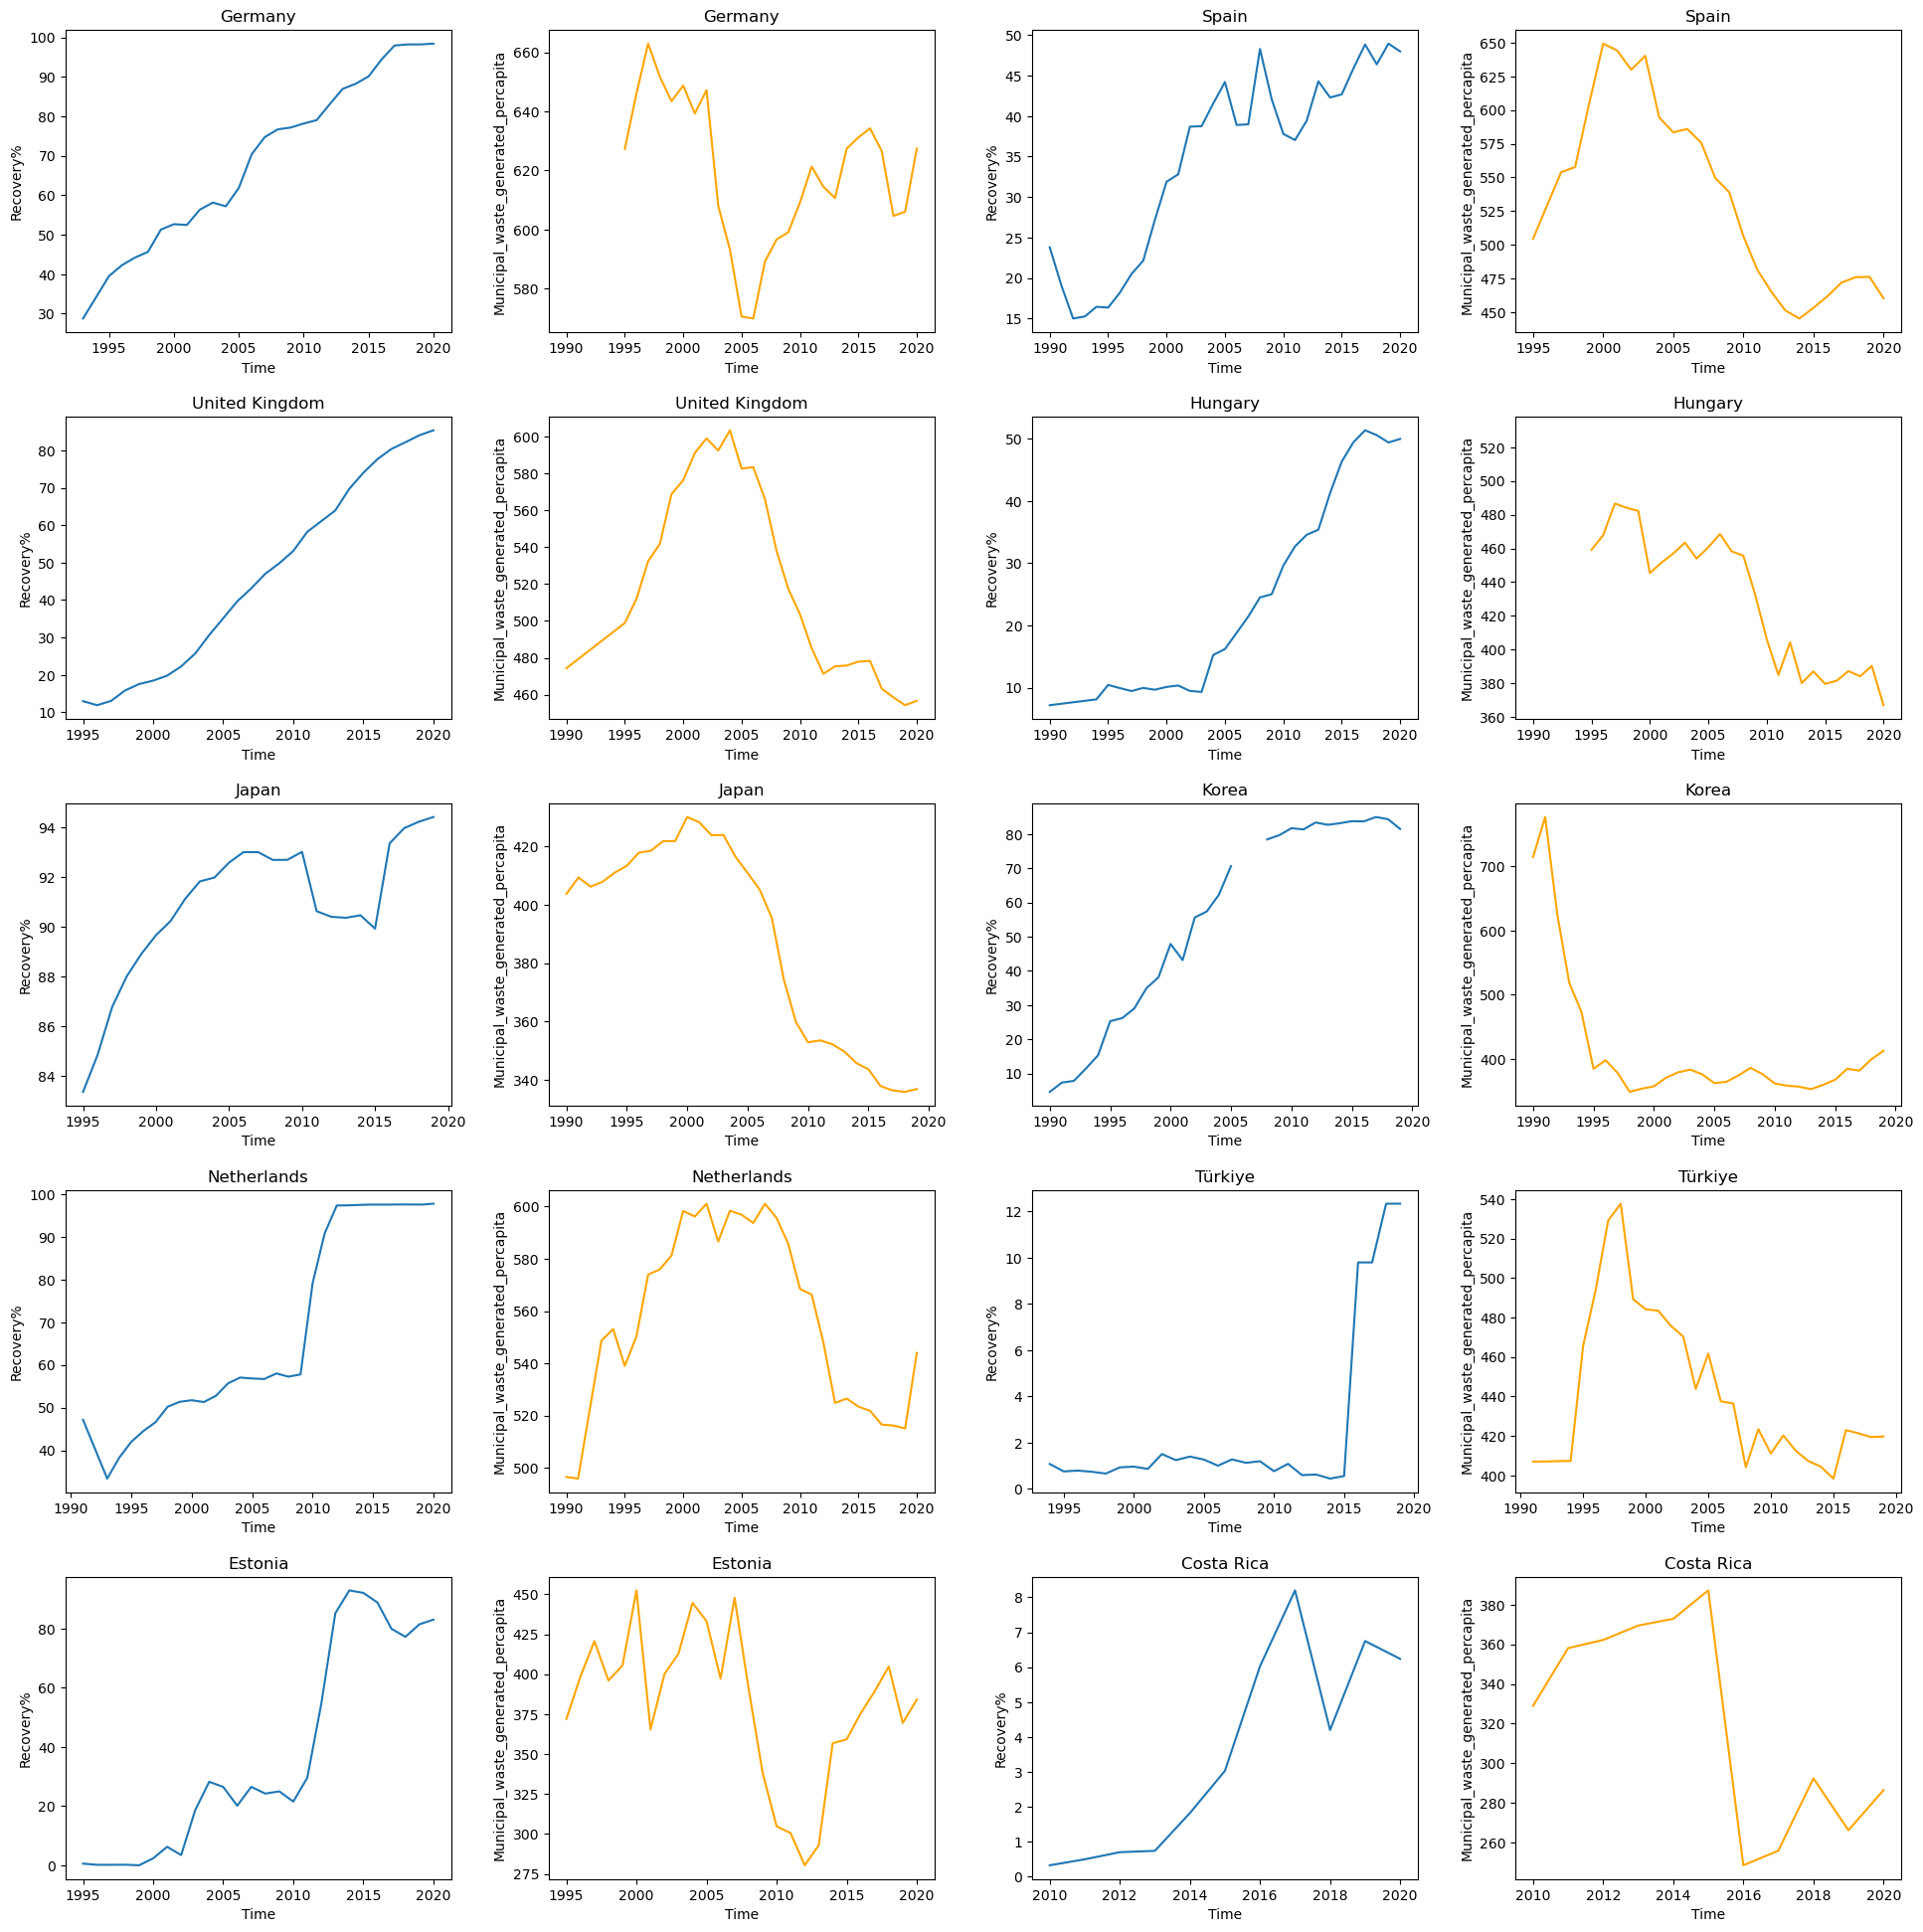

In [18]:
fig, axs = hyp.group_time_series(df1, corr_list1, (20,20))
plt.show()

#### Group 2

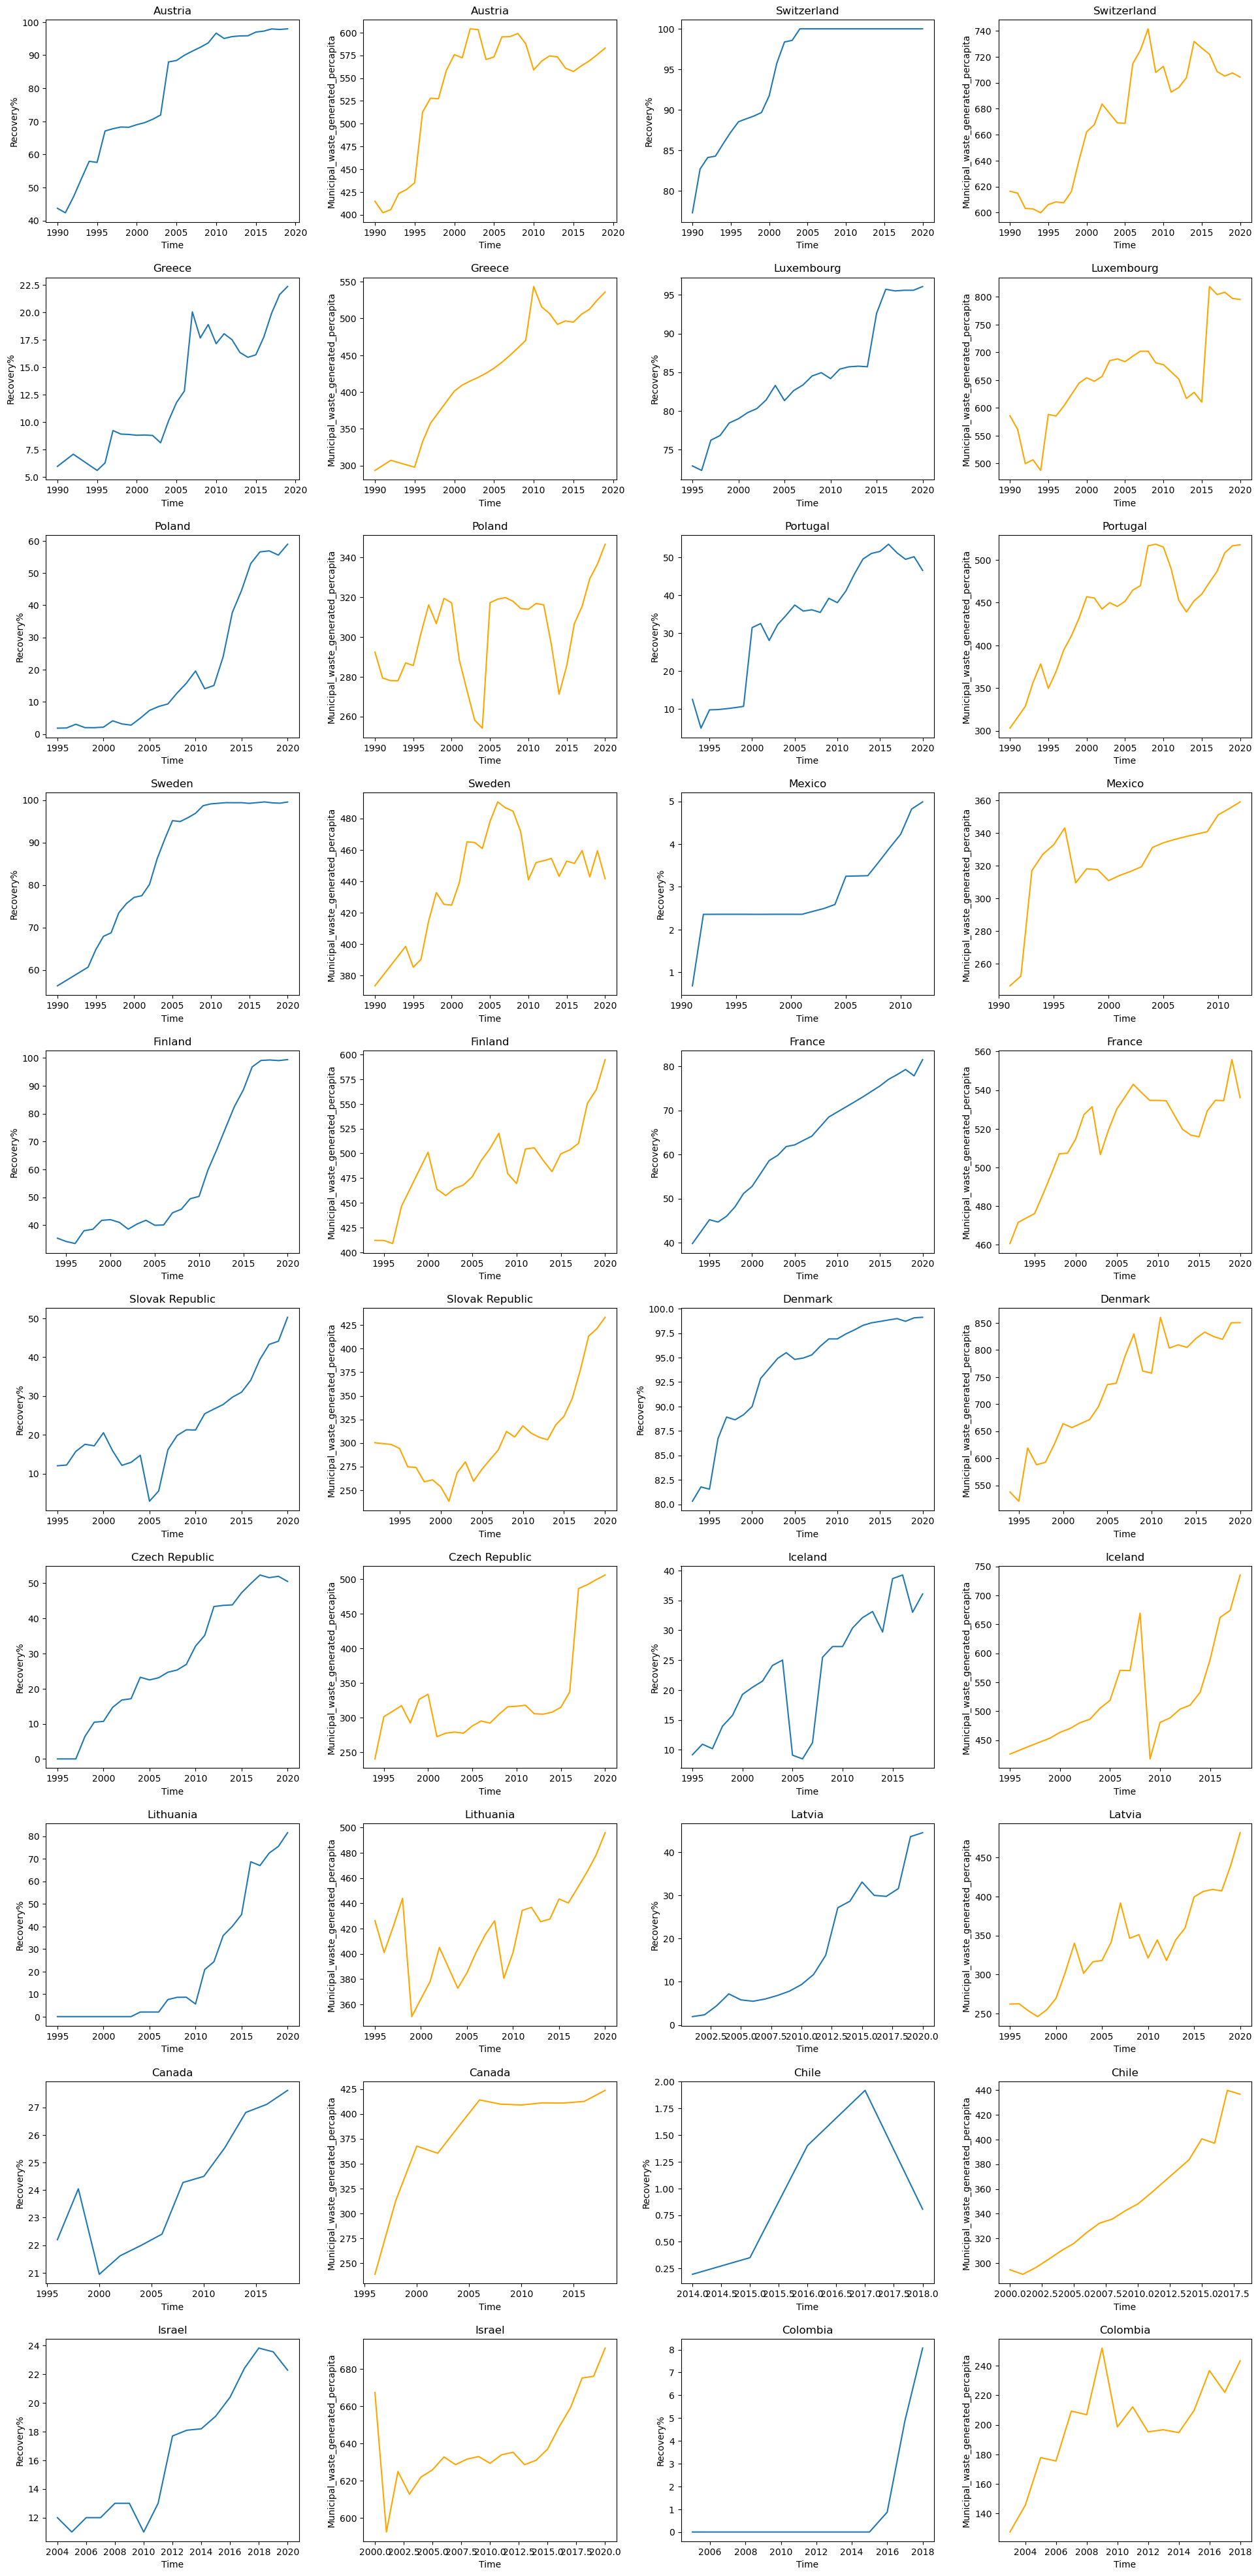

In [19]:
fig, axs = hyp.group_time_series(df1, corr_list2, (20,40))
plt.show()

#### Group 3

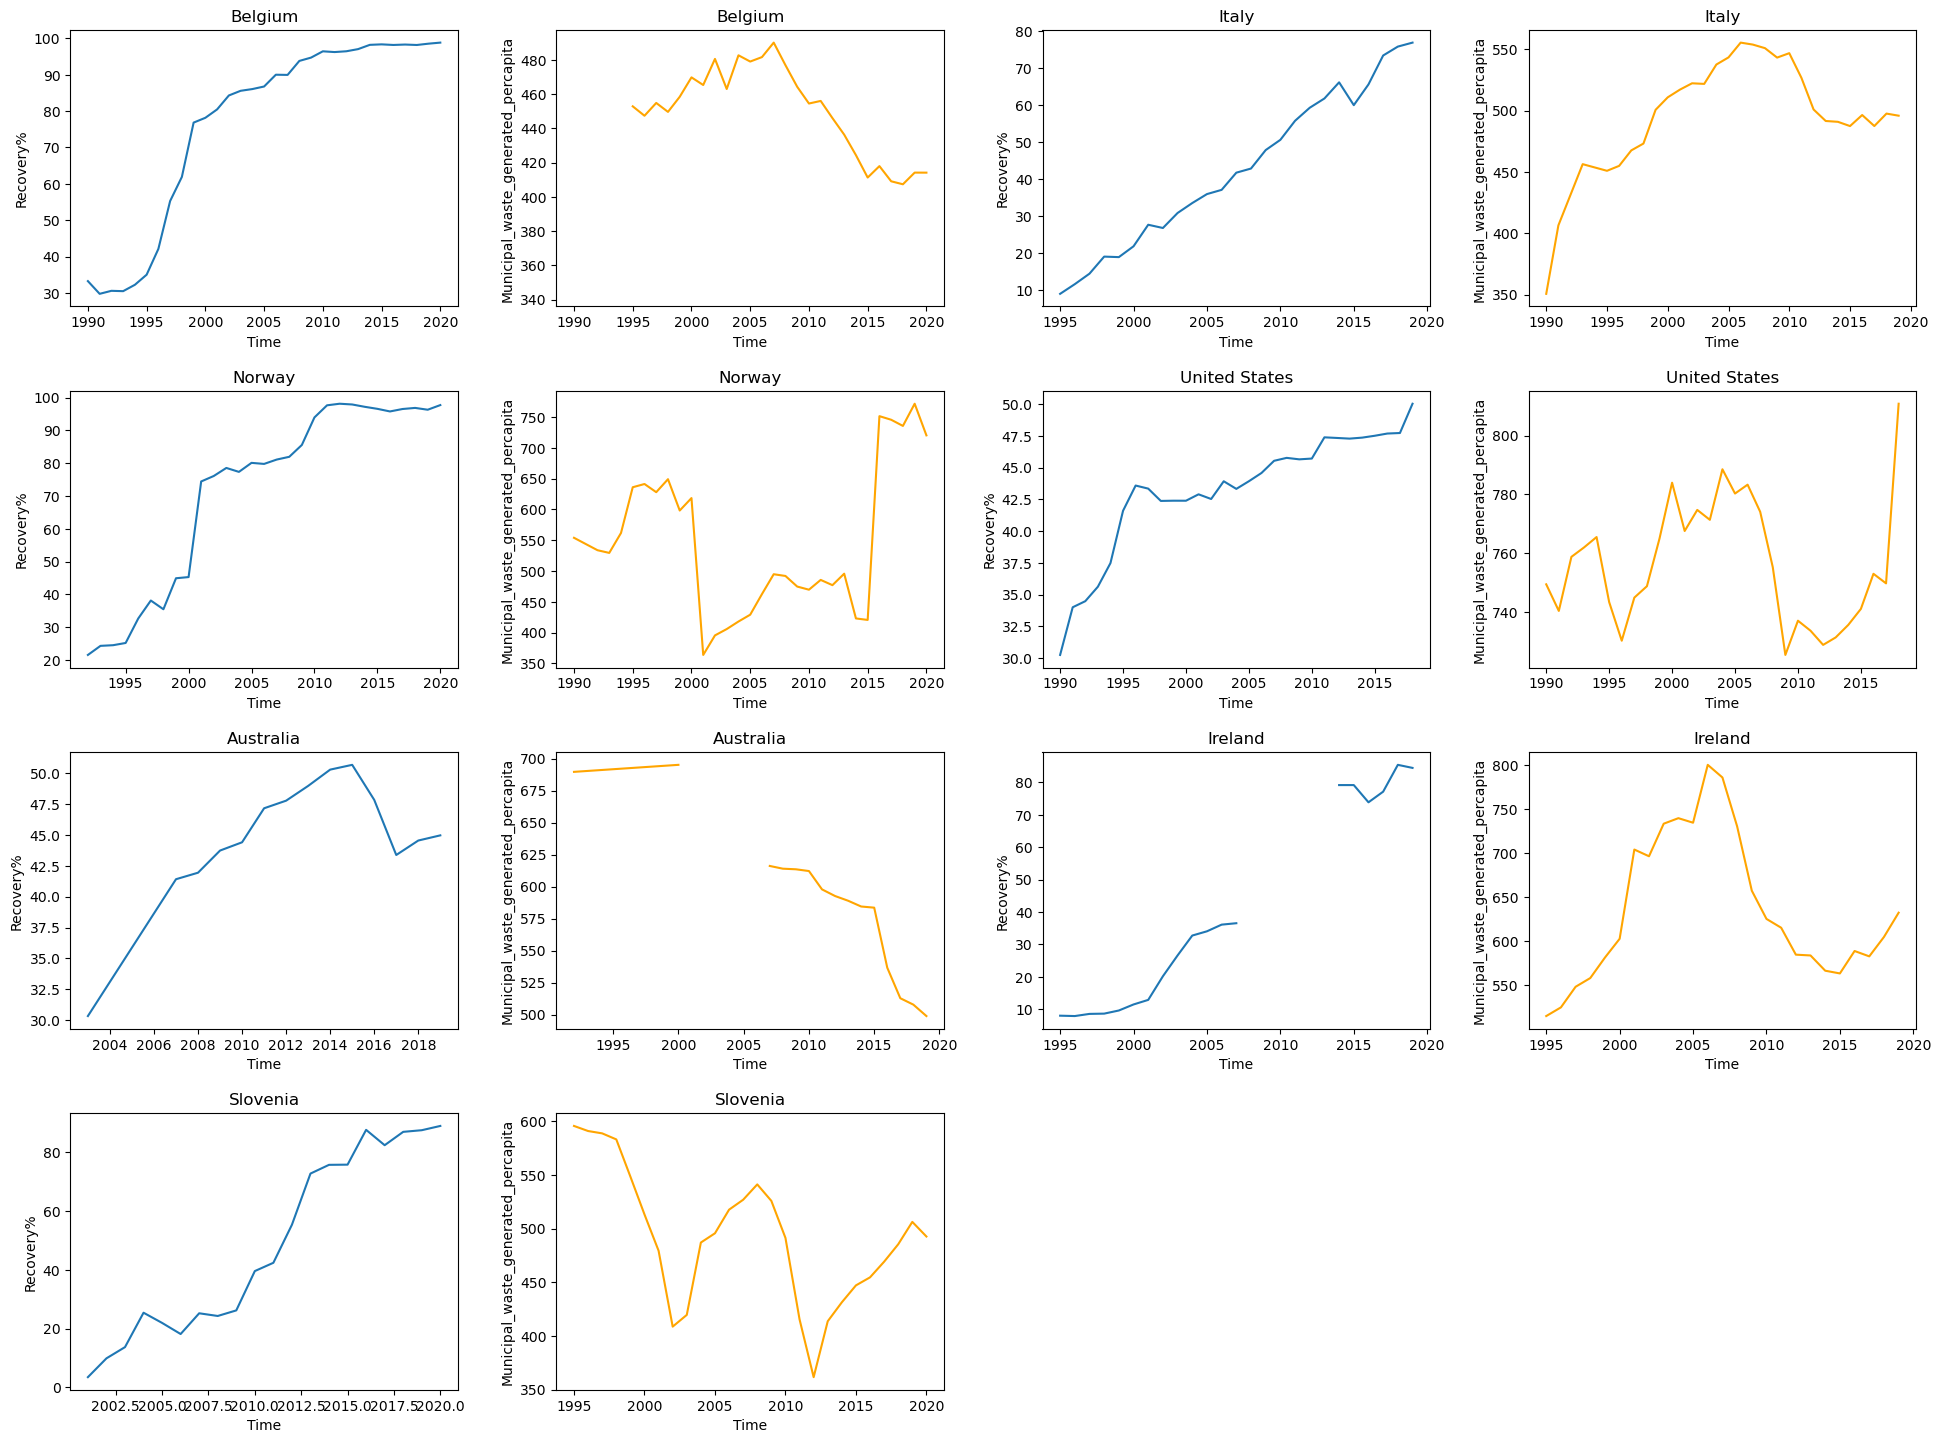

In [22]:
fig, axs = hyp.group_time_series(df1, corr_list3, (20,15))
plt.show()

In [21]:
corr_list3

[['Belgium', 0.13208038061029756],
 ['Italy', 0.141209333622698],
 ['Norway', -0.12021948063644552],
 ['United States', -0.021757389658548232],
 ['Australia', -0.028415735028673707],
 ['Ireland', -0.047008606965265806],
 ['Slovenia', -0.1592689352555206]]

#### References and Citation for Code

1] https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object <br>
2] https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots <br>
3] https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot <br>
4] https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/ <br>
5] https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot <br>
6] https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell <br>
7] https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value <br>